In [33]:
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np
import sys
import scipy.io.wavfile
from scipy.signal import correlate
from IPython.display import Audio
from audio import *
from operator import truediv 

In [55]:
#generating white noise signal 

transmitted_noise = np.random.normal(0,5000,40000)
scipy.io.wavfile.write(r"noise.wav", 10000, transmitted_noise.astype(np.int16))

In [56]:
Audio("noise.wav")

In [72]:
#record noise signal 

record_audio('received_noise.wav', 3, 44100)

received_noise= scipy.io.wavfile.read('received_noise.wav', mmap=False)[1]

Recording
Finished recording


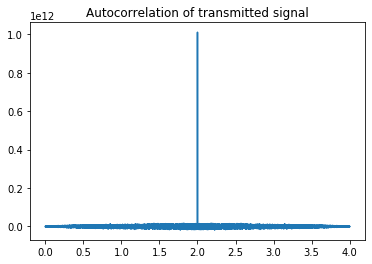

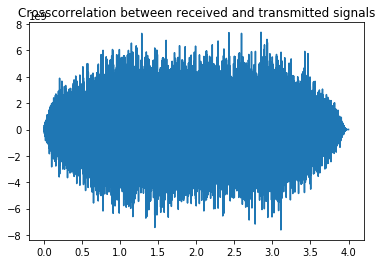

79999

In [79]:
#define auto and cross correlations

ac= scipy.signal.correlate(transmitted_noise, transmitted_noise, mode='full', method='auto')
cc= scipy.signal.correlate(transmitted_noise, received_noise, mode='full', method='auto')

time1 = np.linspace(0, 4, num=len(ac))
time2 = np.linspace(0, 4, num=len(cc))

plt.title('Autocorrelation of transmitted signal')
plt.plot(time1, ac)
plt.show()

plt.title('Crosscorrelation between received and transmitted signals')
plt.plot(time2, cc)
plt.show()

len(cc)
len(ac)

In [85]:
#taking dft

dft_ac= np.fft.fft(ac, n=None, axis=-1, norm=None)
dft_cc= np.fft.fft(cc, n=None, axis=-1, norm=None)

print(len(dft_cc))
len(dft_ac)

172095


79999

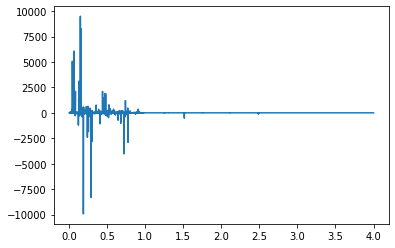

In [86]:
#finding psd

psd = list(map(truediv, dft_cc[0:len(dft_ac)], dft_ac))

plt.plot(time1, psd)
plt.show()